In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('train.csv')

In [4]:
df = pd.read_csv('delivery_data_geopy.csv')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,Delivery_person_Age,Delivery_person_Ratings,Total_Distance,Time_Of_Day,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,3.02,Morning,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,34,4.5,20.14,Evening,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,23,4.4,1.55,Morning,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,38,4.7,7.77,Evening,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,32,4.6,6.20,Afternoon,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,1.49,Morning,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32
45589,21,4.6,10.98,Evening,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36
45590,30,4.9,4.65,Night,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16
45591,20,4.7,6.22,Afternoon,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26


In [7]:
df1.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [8]:
df1 = df1.iloc[:,4:8]

In [9]:
df = pd.concat([df,df1],axis=1)

In [10]:
df.drop('Total_Distance',axis=1,inplace=True)

In [11]:
df

,Delivery_person_Age,Delivery_person_Ratings,Time_Of_Day,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,37,4.9,Morning,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,22.745049,75.892471,22.765049,75.912471
1,34,4.5,Evening,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,12.913041,77.683237,13.043041,77.813237
2,23,4.4,Morning,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,12.914264,77.678400,12.924264,77.688400
3,38,4.7,Evening,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,11.003669,76.976494,11.053669,77.026494
4,32,4.6,Afternoon,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,Morning,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,26.902328,75.794257,26.912328,75.804257
45589,21,4.6,Evening,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,0.000000,0.000000,0.070000,0.070000
45590,30,4.9,Night,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,13.022394,80.242439,13.052394,80.272439
45591,20,4.7,Afternoon,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,11.001753,76.986241,11.041753,77.026241


In [74]:
## =arccos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371    --- (6371 is Earth radius in km.) 

In [13]:
df.Restaurant_latitude = np.radians(df.Restaurant_latitude)
df.Restaurant_longitude = np.radians(df.Restaurant_longitude)
df.Delivery_location_latitude = np.radians(df.Delivery_location_latitude)
df.Delivery_location_longitude = np.radians(df.Delivery_location_longitude)

In [14]:
df.iloc[:,-4:]

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,0.396976,1.324573,0.397325,1.324923
1,0.225375,1.355828,0.227644,1.358097
2,0.225396,1.355744,0.225571,1.355918
3,0.192050,1.343493,0.192923,1.344366
4,0.226418,1.400626,0.227116,1.401325
...,...,...,...,...
45588,0.469534,1.322859,0.469709,1.323034
45589,0.000000,0.000000,0.001222,0.001222
45590,0.227284,1.400495,0.227807,1.401018
45591,0.192017,1.343663,0.192715,1.344362


In [15]:
### Formula for calculating distance from lats and lons

np.arccos(np.sin(0.396976)*np.sin(0.397325)+np.cos(0.396976)*np.cos(0.397325)*np.cos(1.324923-1.324573))*6371

3.0285645506799175

In [16]:
def dist(row):
    lat1,lon1,lat2,lon2 = df['Restaurant_latitude'],df['Restaurant_longitude'],df['Delivery_location_latitude'],df['Delivery_location_longitude']
    distribution = np.arccos(np.sin(lat1)*np.sin(lat2)+np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1))*6371
    return distribution

In [17]:
df['total_distance'] = dist(df)

In [18]:
df

,Delivery_person_Age,Delivery_person_Ratings,Time_Of_Day,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,total_distance
0,37,4.9,Morning,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,0.396976,1.324573,0.397325,1.324923,3.025149
1,34,4.5,Evening,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,0.225375,1.355828,0.227644,1.358097,20.183530
2,23,4.4,Morning,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,0.225396,1.355744,0.225571,1.355918,1.552758
3,38,4.7,Evening,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,0.192050,1.343493,0.192923,1.344366,7.790401
4,32,4.6,Afternoon,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,0.226418,1.400626,0.227116,1.401325,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,Morning,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,0.469534,1.322859,0.469709,1.323034,1.489846
45589,21,4.6,Evening,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,0.000000,0.000000,0.001222,0.001222,11.007735
45590,30,4.9,Night,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,0.227284,1.400495,0.227807,1.401018,4.657195
45591,20,4.7,Afternoon,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,0.192017,1.343663,0.192715,1.344362,6.232393


In [19]:
df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Festival'],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
oe = OrdinalEncoder()

In [22]:
df[df.select_dtypes([object]).columns] = oe.fit_transform(df[df.select_dtypes([object]).columns])

In [23]:
col = df.columns
col

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Of_Day',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'City',
       'Time_taken(min)', 'total_distance'],
      dtype='object')

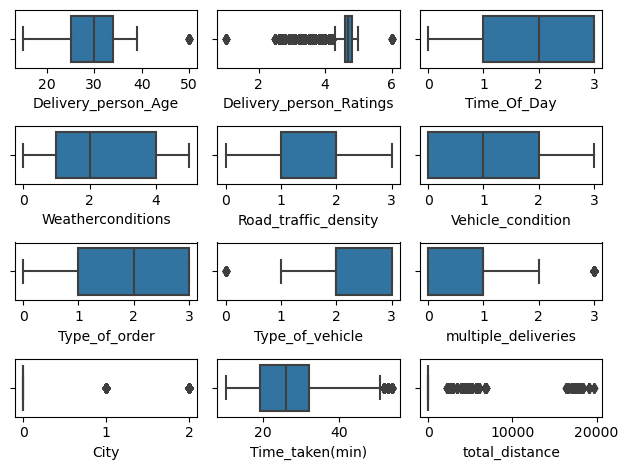

In [24]:
for i in range(len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = df[col[i]])

plt.tight_layout()
plt.show()

In [25]:
q1,q3 = df.total_distance.quantile(0.25),df.total_distance.quantile(0.75)
q1,q3

(4.663493140546799, 13.763977224514544)

In [26]:
iqr = q3-q1
ul = q3 + 1.5*iqr

In [27]:
df.total_distance = np.where(df.total_distance>ul,ul,df.total_distance)

In [28]:
df.City = df.City.replace(1.0,2.0)

In [29]:
df.total_distance = df.total_distance.round(1)

In [30]:
df

,Delivery_person_Age,Delivery_person_Ratings,Time_Of_Day,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),total_distance
0,37,4.9,2.0,4.0,0.0,2,3.0,2.0,0,2.0,24,3.0
1,34,4.5,1.0,3.0,1.0,2,3.0,3.0,1,0.0,33,20.2
2,23,4.4,2.0,2.0,2.0,0,1.0,2.0,1,2.0,26,1.6
3,38,4.7,1.0,4.0,3.0,0,0.0,2.0,1,0.0,21,7.8
4,32,4.6,0.0,0.0,0.0,1,3.0,3.0,1,0.0,30,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,2.0,5.0,0.0,1,2.0,2.0,0,0.0,32,1.5
45589,21,4.6,1.0,5.0,1.0,0,0.0,2.0,1,0.0,36,11.0
45590,30,4.9,3.0,0.0,2.0,1,1.0,3.0,0,0.0,16,4.7
45591,20,4.7,0.0,0.0,0.0,0,3.0,2.0,1,0.0,26,6.2


In [31]:
x = df.drop('Time_taken(min)',axis=1)

In [32]:
y = df['Time_taken(min)']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2 ,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(x_test)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
r2_score(y_test,y_pred)

0.479873159632356

In [41]:
mean_squared_error(y_test,y_pred)

45.60375222607236

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor(bootstrap=True,max_features=8,max_depth=11,random_state=101)

In [44]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=11, max_features=8, random_state=101)

In [45]:
y_pred_rfr = rfr.predict(x_test)

In [46]:
r2_score(y_test,y_pred_rfr)

0.8220611938287994

In [47]:
mean_squared_error(y_test,y_pred_rfr)

15.601342976837737

In [48]:
ad = pd.Series(rfr.feature_importances_,index=x_train.columns)
ad.sort_values(ascending=False)

Delivery_person_Ratings    0.222995
Weatherconditions          0.179450
Road_traffic_density       0.131274
multiple_deliveries        0.129253
total_distance             0.125406
Delivery_person_Age        0.088455
Vehicle_condition          0.083148
Time_Of_Day                0.030990
City                       0.003688
Type_of_order              0.003649
Type_of_vehicle            0.001691
dtype: float64

In [49]:
import xgboost as xg

In [50]:
xgr = xg.XGBRegressor()

In [51]:
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred_xg = xgr.predict(x_test)

In [53]:
r2_score(y_test,y_pred_xg)

0.8086038133852461

In [54]:
mean_squared_error(y_test,y_pred_xg)

16.78126101937907

In [55]:
# applying deep learning ANN model on this dataset

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
model = Sequential()

In [66]:
model.add(Dense(128,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [67]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [71]:
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.0456 - val_loss: 18.3525
Epoch 2/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.0868 - val_loss: 18.9917
Epoch 3/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.7998 - val_loss: 18.8024
Epoch 4/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.9694 - val_loss: 18.7590
Epoch 5/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.8941 - val_loss: 19.0054
Epoch 6/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.8465 - val_loss: 18.4396
Epoch 7/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.9648 - val_loss: 18.6613
Epoch 8/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.7894 - val_loss: 20.3284
Epoch 9/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.7824 - val_loss: 18.8933
Epoch 10/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.6626 - val_loss: 20.2338
Epoch 11/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.7905 - val_loss: 19.6007
Epoch 12

In [72]:
y_pred_ann = model.predict(x_test)

285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step


In [73]:
r2_score(y_test,y_pred_ann)

0.7903526571231105